In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



• Consumo promedio de potencia (kw): Esta columna representa el consumo promedio de potencia (en kilovatios) de las máquinas CNC de producción sobre un lote de tiempo de 10 minutos. Proporciona información sobre el uso de energía de las máquinas CNC durante su operación.

• Consumo promedio de potencia (kw): Similar a "consumo promedio de potencia", esta columna indica el consumo promedio de potencia (en kilovatios) de los instrumentos dentro de la estación de trabajo CNC durante el mismo lote de tiempo de 10 minutos. Ofrece una visión más detallada del uso de energía dentro de la estación de trabajo CNC.

• Columnas de temperatura (Temp CNC 1 a Temp CNC 10): Estas columnas contienen lecturas de temperatura tomadas por sensores ubicados cerca de las máquinas CNC. Cada columna probablemente corresponde a una específica localización o aspecto dentro del entorno CNC. Por ejemplo, las temperaturas pueden medirse cerca de componentes críticos, sistemas de refrigeración o diferentes zonas dentro del área de producción.

• Columnas de humedad (Humedad CNC 1 a Humedad CNC 10): De manera similar, estas columnas proporcionan mediciones de humedad obtenidas de sensores posicionados cerca de las máquinas CNC. Los niveles de humedad pueden influir en el rendimiento de las máquinas, el comportamiento del material y el confort y seguridad general del medio ambiente.

• Columnas del entorno exterior (Temp fuera, Presión atmosférica fuera, Humedad fuera, Velocidad del viento fuera, Visibilidad fuera, Punto rosado fuera): Estas columnas se refieren a condiciones ambientales exteriores donde se encuentran las máquinas CNC. Incluyen mediciones de temperatura, presión atmosférica, humedad, velocidad del viento, visibilidad y punto rosado. Monitorear estos factores puede ayudar a evaluar cómo las condiciones externas pueden afectar las operaciones CNC y el entorno de fabricación en general.

con las columas anteriores devo crear un modelo predictivo para predecir el consumo promedio de energía de una fábrica durante un período de 10 minutos utilizando datos de sensores recopilados en los últimos 1 a 4 horas. La investigación busca identificar la ventana de tiempo y el enfoque más eficiente para realizar estas predicciones.

In [80]:
df = pd.read_csv ("Data/factory.csv", header=0, delim_whitespace=True)

OSError: [Errno 22] Invalid argument: 'Data/factory.csv'

In [ ]:
df.head()

,time_batch,factory_average_kw,work_station_average_kw,temp_CNC_1,humidity_CNC_1,temp_CNC_2,humidity_CNC_2,temp_CNC_3,humidity_CNC_3,temp_CNC_4,...,temp_CNC_9,humidity_CNC_9,temp_outside,press_mm_hg_outside,humidity_outside,windspeed_outside,visibility_outside,dewpoint_outside,temp_CNC_10,humidity_CNC_10
11-01-2016,17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
11-01-2016,17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
11-01-2016,17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
11-01-2016,17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
11-01-2016,17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.columns

Index(['time_batch', 'factory_average_kw', 'work_station_average_kw',
       'temp_CNC_1', 'humidity_CNC_1', 'temp_CNC_2', 'humidity_CNC_2',
       'temp_CNC_3', 'humidity_CNC_3', 'temp_CNC_4', 'humidity_CNC_4',
       'temp_CNC_5', 'humidity_CNC_5', 'temp_CNC_6', 'humidity_CNC_6',
       'temp_CNC_7', 'humidity_CNC_7', 'temp_CNC_8', 'humidity_CNC_8',
       'temp_CNC_9', 'humidity_CNC_9', 'temp_outside', 'press_mm_hg_outside',
       'humidity_outside', 'windspeed_outside', 'visibility_outside',
       'dewpoint_outside', 'temp_CNC_10', 'humidity_CNC_10'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 11-01-2016 to 27-05-2016
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time_batch               19735 non-null  object 
 1   factory_average_kw       19735 non-null  int64  
 2   work_station_average_kw  19735 non-null  int64  
 3   temp_CNC_1               19735 non-null  float64
 4   humidity_CNC_1           19735 non-null  float64
 5   temp_CNC_2               19735 non-null  float64
 6   humidity_CNC_2           19735 non-null  float64
 7   temp_CNC_3               19735 non-null  float64
 8   humidity_CNC_3           19735 non-null  float64
 9   temp_CNC_4               19735 non-null  float64
 10  humidity_CNC_4           19735 non-null  float64
 11  temp_CNC_5               19735 non-null  float64
 12  humidity_CNC_5           19735 non-null  float64
 13  temp_CNC_6               19735 non-null  float64
 14  humidity_CNC_

In [ ]:
df['time_batch'] = pd.to_datetime(df['time_batch'])

C:\Users\jeffe\AppData\Local\Temp\ipykernel_14892\1294405932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_batch'] = pd.to_datetime(df['time_batch'])


In [ ]:
df["factory_average_kw"].unique()

array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
        120,  190,  110,  400,  390,  240,   40,   30,  310,  380,  370,
         20,  260,  500,  450,  220,  170,  290,  130,  200,  210,  180,
        350,  300,  340,  150,  330,  420,  520,  360,  270,  550,  690,
        620,  610,  490,  410,  320,  740,  910,  510,  790,  460,  160,
        480,  280,  560, 1080,  750,  470,  440,  800,  540,  530,  660,
        630,  600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,
        670,  780,  640,  650,  700,  770,  720,  760,  860,  880,  730,
        900,  820,  870,  840], dtype=int64)

In [ ]:
df["factory_average_kw"].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: factory_average_kw, dtype: float64

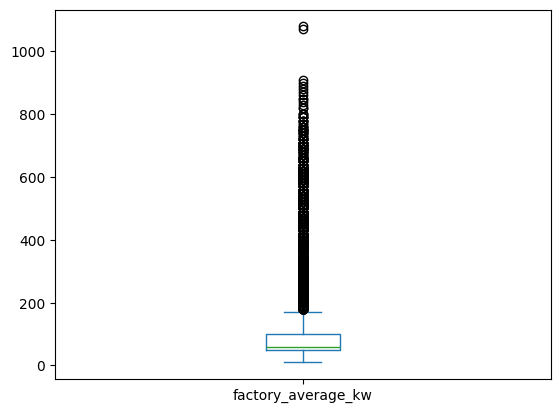

<Figure size 1500x2000 with 0 Axes>

In [ ]:
ax = df["factory_average_kw"].plot.box()

# Ajusta los límites del eje x para mostrar todos los valores
plt.figure(figsize=(15,20))
plt.show()

In [ ]:
X = df[['factory_average_kw', 'work_station_average_kw', 'temp_CNC_1', 'humidity_CNC_1', 'temp_CNC_2', 'humidity_CNC_2', 'temp_CNC_3', 'humidity_CNC_3', 'temp_CNC_4', 'humidity_CNC_4', 'temp_CNC_5', 'humidity_CNC_5', 'temp_CNC_6', 'humidity_CNC_6', 'temp_CNC_7', 'humidity_CNC_7','temp_CNC_8', 'humidity_CNC_8','temp_CNC_9', 'humidity_CNC_9','temp_CNC_10', 'humidity_CNC_10', 'temp_outside', 'press_mm_hg_outside', 'humidity_outside', 'windspeed_outside', 'visibility_outside', 'dewpoint_outside']]
y = df['time_batch']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

ValueError: could not convert string to float: '12:30'